CNN Notebook © Arkaprabha Majumdar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential,load_model,save_model
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils import np_utils
from keras.optimizers import Adadelta

Using TensorFlow backend.


The **LeNet** was devised by LeCun in 1988 !

It gave 99.31 % accuracy on MNIST test data

In [2]:
#load the mnist data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[1]

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.reshape(x_train.shape+(1,))
x_test = x_test.reshape(x_test.shape+(1,))

In [4]:
#then we prepare the images for our LeNet
input_shape = x_train.shape[1:4]

x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255

#ONE hot encode
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

## Next, we can replicate the layers used in the original **LeNet**

In [ ]:
model = Sequential()

#first two convolution layers
model.add(Conv2D(20,(5,5),padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(50,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2),(2,2)))

#first FC layer
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))

#we use sofmax for classification
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss = 'binary_crossentropy',
              optimizer = Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

In [ ]:
#training our LeNet
batch_size = 128
epochs = 10

history = model.fit(x_train,y_train,
                    batch_size,
                    epochs,
                    validation_data=(x_test,y_test),
                    shuffle = True)

scores = model.evaluate(x_test,y_test, verbose = 1)
print('Test loss : ',scores[0])
print('Test accuracy : ',scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0460 - accuracy: 0.9841 - val_loss: 0.0139 - val_accuracy: 0.9951
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.0090 - val_accuracy: 0.9967
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 4/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0077 - val_accuracy: 0.9970
Epoch 5/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0065 - val_accuracy: 0.9978
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0046 - val_accuracy: 0.9983
Epoch 7/10
60000/60000 [==============================] - 115s

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/LeNet , AlexNet/lenet_for_mnist_128_batch_10_epoch.h5")

In [5]:
model = load_model("/content/drive/My Drive/Colab Notebooks/LeNet , AlexNet/lenet_for_mnist_128_batch_10_epoch.h5")

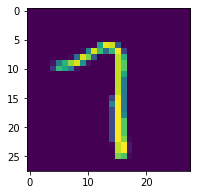

Actual class :  7
predicted class :  7


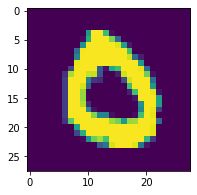

Actual class :  0
predicted class :  0


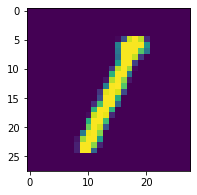

Actual class :  1
predicted class :  1


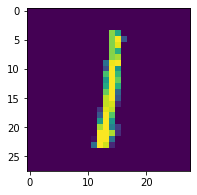

Actual class :  1
predicted class :  1


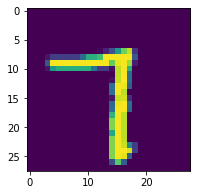

Actual class :  7
predicted class :  7


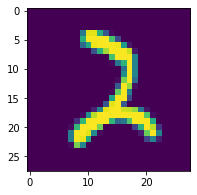

Actual class :  2
predicted class :  2


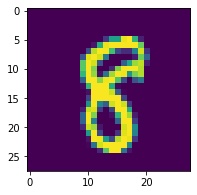

Actual class :  8
predicted class :  8


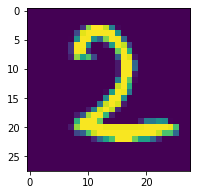

Actual class :  2
predicted class :  2


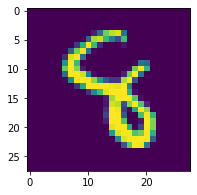

Actual class :  8
predicted class :  8


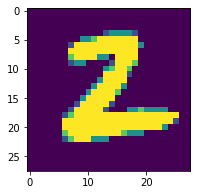

Actual class :  2
predicted class :  2


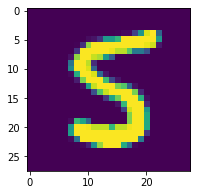

Actual class :  5
predicted class :  5


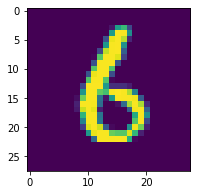

Actual class :  6
predicted class :  6


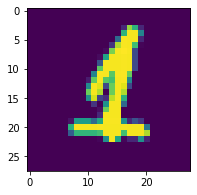

Actual class :  1
predicted class :  1


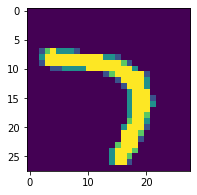

Actual class :  7
predicted class :  7


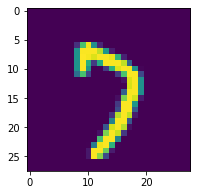

Actual class :  7
predicted class :  7


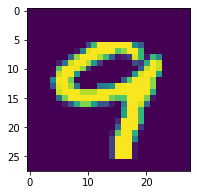

Actual class :  9
predicted class :  9


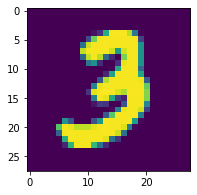

Actual class :  3
predicted class :  3


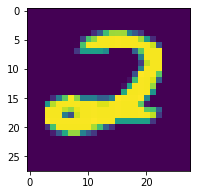

Actual class :  2
predicted class :  2


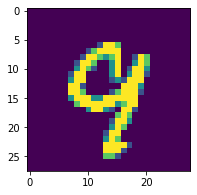

Actual class :  9
predicted class :  9


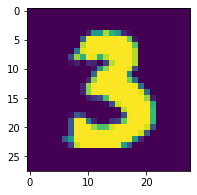

Actual class :  3
predicted class :  3


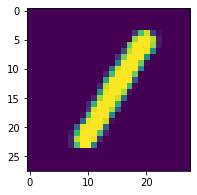

Actual class :  1
predicted class :  1


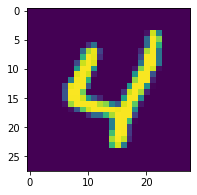

Actual class :  4
predicted class :  4


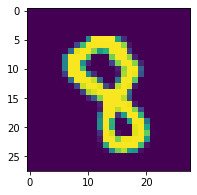

Actual class :  8
predicted class :  8


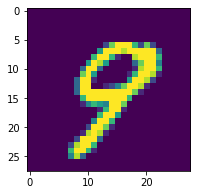

Actual class :  9
predicted class :  9


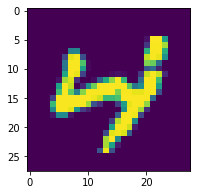

Actual class :  4
predicted class :  4


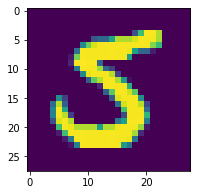

Actual class :  5
predicted class :  5


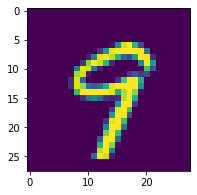

Actual class :  9
predicted class :  9


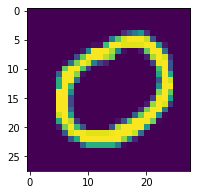

Actual class :  0
predicted class :  0


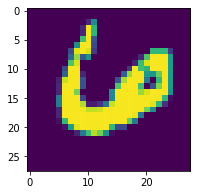

Actual class :  6
predicted class :  6


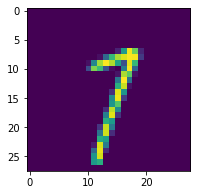

Actual class :  7
predicted class :  7


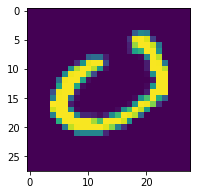

Actual class :  0
predicted class :  0


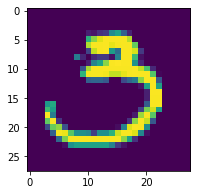

Actual class :  3
predicted class :  3


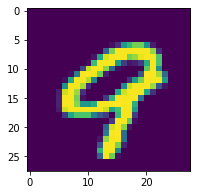

Actual class :  9
predicted class :  9


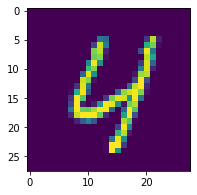

Actual class :  4
predicted class :  4


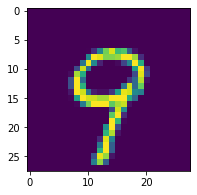

Actual class :  9
predicted class :  9


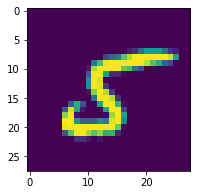

Actual class :  5
predicted class :  5


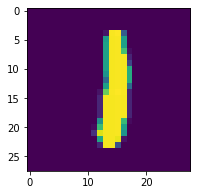

Actual class :  1
predicted class :  1


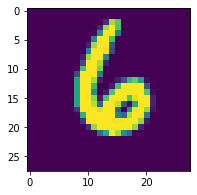

Actual class :  6
predicted class :  6


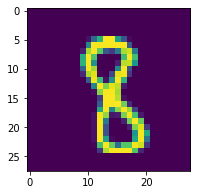

Actual class :  8
predicted class :  8


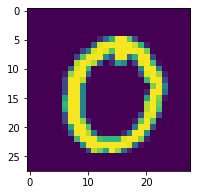

Actual class :  0
predicted class :  0


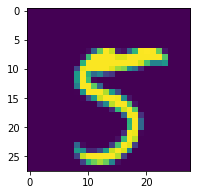

Actual class :  5
predicted class :  5


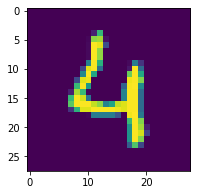

Actual class :  4
predicted class :  4


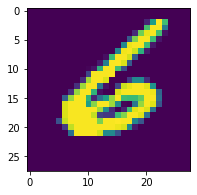

Actual class :  6
predicted class :  6


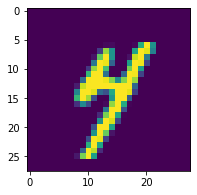

Actual class :  4
predicted class :  4


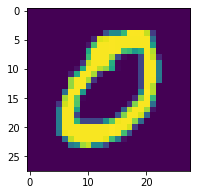

Actual class :  0
predicted class :  0


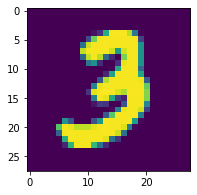

Actual class :  3
predicted class :  3


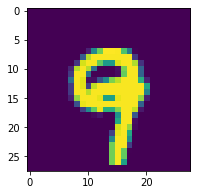

Actual class :  9
predicted class :  9


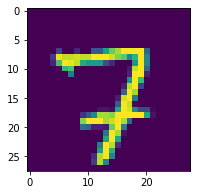

Actual class :  7
predicted class :  7


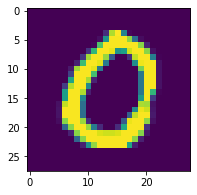

Actual class :  0
predicted class :  0


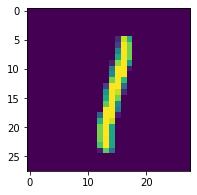

Actual class :  1
predicted class :  1


In [25]:
for i in range(50):
  rand=np.random.randint(0,len(x_test))
  im = x_test[rand]
  plt.figure(figsize=(3,3))
  plt.imshow(im.reshape(im.shape[0],im.shape[1])*255)
  plt.show()
  res = model.predict_classes(im.reshape((1,)+im.shape))
  print('Actual class : ',np.where(y_test[rand]==1)[0][0])
  print('predicted class : ',res[0])

In [6]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
x_test[0].shape

(28, 28, 1)

In [18]:
9%5

4